In [1]:
import numpy as np
import matplotlib.pyplot as plt
from models import topaz

In [2]:
mask = topaz.get_mask('/mnt/nird/TP4/test/depth_TP4b0.12_01.a')

filename = "/mnt/nird/TP4/test/TP4restart2007_002_00_mem001.a"
u = topaz.read_data(filename, 'u', 1, mask)
v = topaz.read_data(filename, 'v', 1, mask)
current = np.array([u, v])
ssh  = topaz.read_data(filename, 'ssh', 0, mask)

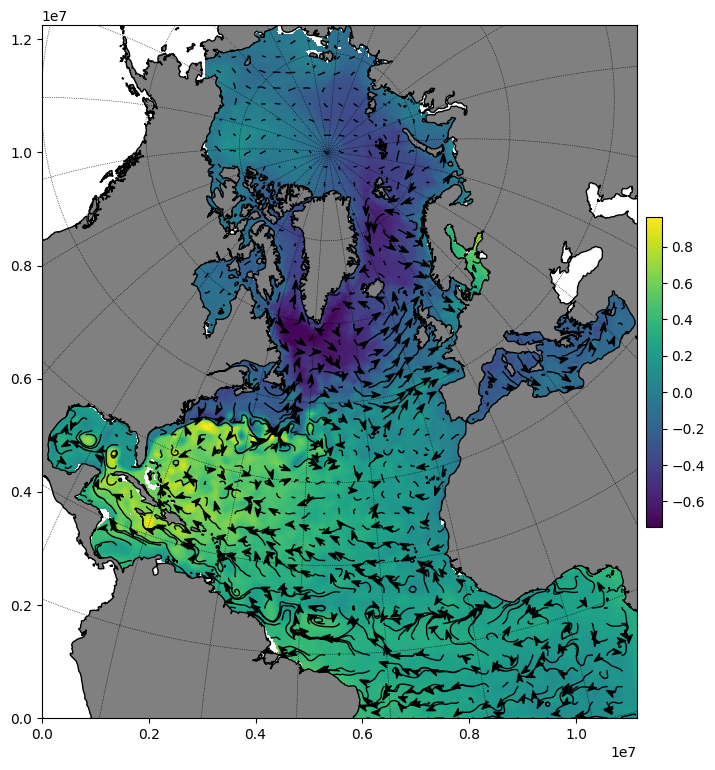

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8,9))

topaz.grid.plot_field(ax, ssh)
topaz.grid.plot_vectors(ax, current, V=0.3, num_steps=100, headwidth=0.2)
topaz.grid.plot_land(ax, color='gray', dlat=15, dlon=15)